In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvdcvd-vd/Social_Network_Ads.csv


In [29]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [30]:
df = pd.read_csv('../input/cvdcvd-vd/Social_Network_Ads.csv')

In [31]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [33]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='count'>

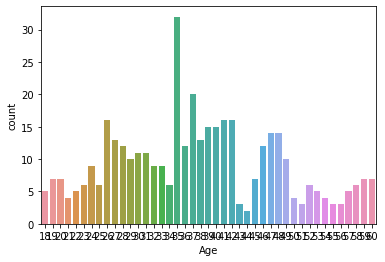

In [34]:
sns.countplot(x='Age', data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

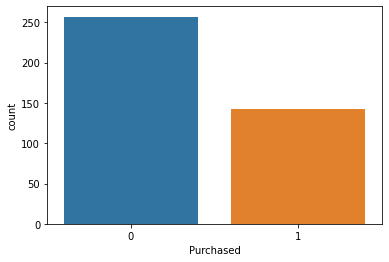

In [35]:
sns.countplot(data=df, x= 'Purchased')

<AxesSubplot:xlabel='Gender', ylabel='count'>

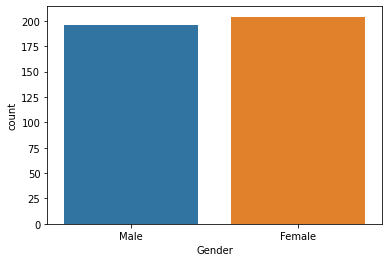

In [36]:
sns.countplot(data=df, x= 'Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

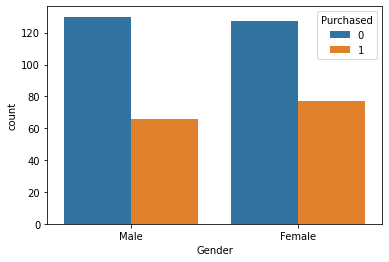

In [37]:
sns.countplot(data=df, x= 'Gender', hue = 'Purchased')

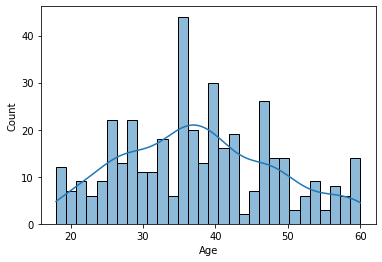

In [38]:
sns.histplot(data=df, x='Age', bins=30, kde=True);

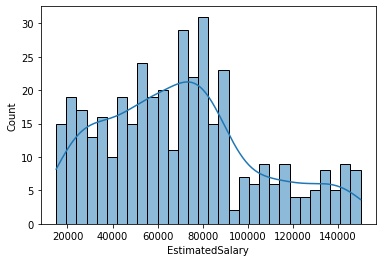

In [39]:
sns.histplot(data=df, x='EstimatedSalary', bins=30, kde=True);

In [40]:
X = df.drop('Purchased', axis=1)
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [41]:
X = pd.get_dummies(X, drop_first=True)
X

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [42]:
y = df['Purchased']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [47]:
# svc.fit(scaled_X_train, y_train)

In [48]:
svc = SVC()

param_grid = {'kernel':['linear', 'rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svc, param_grid)

grid.fit(scaled_X_train, y_train)

grid.best_params_

# grid_preds = grid.predict(scaled_X_test)

{'kernel': 'rbf'}

In [49]:
svc = SVC(kernel='rbf')

svc.fit(scaled_X_train, y_train)

# preds = svc.predict(X_test)

SVC()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [51]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.92      0.94      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



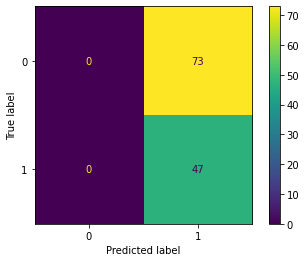

In [52]:
report(svc)

In [53]:
models={
        'LR':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'DT':DecisionTreeClassifier(),
        'NB':GaussianNB(),
        'RF':RandomForestClassifier()
        }

In [54]:
scores = {}

In [55]:
for i, model in models.items():

    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)
    

model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        73
           1       0.86      0.40      0.55        47

    accuracy                           0.74       120
   macro avg       0.79      0.68      0.68       120
weighted avg       0.77      0.74      0.71       120

--------------------------------------------------
model:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        73
           1       0.71      0.47      0.56        47

    accuracy                           0.72       120
   macro avg       0.71      0.67      0.68       120
weighted avg       0.72      0.72      0.70       120

--------------------------------------------------
model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.89      0.83      0.8